In [2]:
import pandas as pd
import os 

In [17]:
data_path = os.path.abspath("/home/alisher/Desktop/prep/MRI-image-preprocessing/missing.xlsx")
names = [ "flair", "t1", "t1ce", "t2"]

In [4]:
data = pd.read_excel(data_path)

In [5]:
data.shape

(69, 2)

In [6]:
data.modalities


AttributeError: 'DataFrame' object has no attribute 'modalities'

In [7]:
data.Modalities

0     [1, 1, 0, 1]
1     [1, 1, 0, 1]
2     [1, 1, 1, 1]
3     [1, 1, 0, 1]
4     [1, 1, 1, 1]
          ...     
64    [0, 0, 1, 0]
65    [1, 1, 1, 1]
66    [1, 1, 1, 1]
67    [1, 1, 1, 1]
68    [1, 1, 0, 1]
Name: Modalities, Length: 69, dtype: object

In [8]:
data.top()

AttributeError: 'DataFrame' object has no attribute 'top'

In [9]:
data.top

AttributeError: 'DataFrame' object has no attribute 'top'

In [13]:
row_size = data.shape[0]
col_size = data.shape[1]

In [19]:
for name in names: 
    data[name] = [0]*row_size

In [20]:
data.head

<bound method NDFrame.head of     Unnamed: 0    Modalities  flair  t1  t1ce  t2
0           43  [1, 1, 0, 1]      0   0     0   0
1           12  [1, 1, 0, 1]      0   0     0   0
2           40  [1, 1, 1, 1]      0   0     0   0
3           69  [1, 1, 0, 1]      0   0     0   0
4           47  [1, 1, 1, 1]      0   0     0   0
..         ...           ...    ...  ..   ...  ..
64           3  [0, 0, 1, 0]      0   0     0   0
65          39  [1, 1, 1, 1]      0   0     0   0
66           8  [1, 1, 1, 1]      0   0     0   0
67          18  [1, 1, 1, 1]      0   0     0   0
68          57  [1, 1, 0, 1]      0   0     0   0

[69 rows x 6 columns]>

In [22]:
data.drop('Unnamed: 0', 1, inplace = True)

In [23]:
data.head

<bound method NDFrame.head of       Modalities  flair  t1  t1ce  t2
0   [1, 1, 0, 1]      0   0     0   0
1   [1, 1, 0, 1]      0   0     0   0
2   [1, 1, 1, 1]      0   0     0   0
3   [1, 1, 0, 1]      0   0     0   0
4   [1, 1, 1, 1]      0   0     0   0
..           ...    ...  ..   ...  ..
64  [0, 0, 1, 0]      0   0     0   0
65  [1, 1, 1, 1]      0   0     0   0
66  [1, 1, 1, 1]      0   0     0   0
67  [1, 1, 1, 1]      0   0     0   0
68  [1, 1, 0, 1]      0   0     0   0

[69 rows x 5 columns]>

In [67]:
def decode(name):
    result = []
    for elem in name: 
        if elem.isdigit(): 
            result.append(int(elem))
    return result
    
def assign_modality(row):
    decoded = decode(row.Modalities)
    for (index, name) in enumerate(names):
        row[name] = decoded[index]
    return row

data = data.apply(assign_modality, axis = 'columns')

In [68]:
data_clean = data.drop('Modalities', 1)

In [69]:
data_clean.head()

,flair,t1,t1ce,t2
0,1,1,0,1
1,1,1,0,1
2,1,1,1,1
3,1,1,0,1
4,1,1,1,1


In [54]:
data_clean.flair

0     1
1     1
2     1
3     1
4     1
     ..
64    0
65    1
66    1
67    1
68    1
Name: flair, Length: 69, dtype: int64

In [56]:
data_clean[data_clean["t1ce"] == 0]

,flair,t1,t1ce,t2
0,1,1,0,1
1,1,1,0,1
3,1,1,0,1
8,1,1,0,1
11,1,1,0,1
26,0,0,0,1
32,1,1,0,1
34,1,1,0,1
36,1,1,0,1
42,1,1,0,1


In [57]:
data_clean.index

RangeIndex(start=0, stop=69, step=1)

In [70]:
was_done = False

In [71]:
if not was_done:
    data_clean = data_clean.reset_index()

In [101]:
only_flair_t1_t2 = data_clean[(data_clean["t1ce"] == 0) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

index    14
flair    14
t1       14
t1ce     14
t2       14
dtype: int64

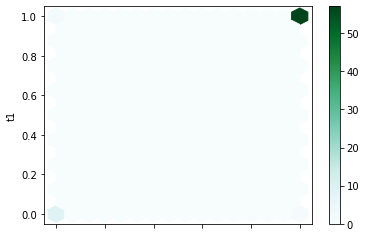

In [115]:
data_clean.plot.hexbin(x = "t2", y  = "t1", gridsize = 15)

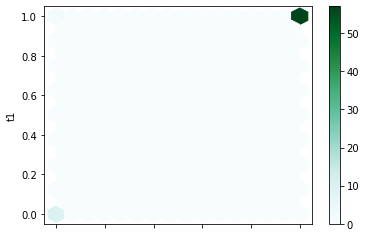

In [116]:
data_clean.plot.hexbin(x = "flair", y  = "t1", gridsize = 15)

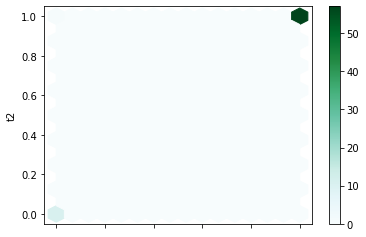

In [117]:
data_clean.plot.hexbin(x = "flair", y  = "t2", gridsize = 15)

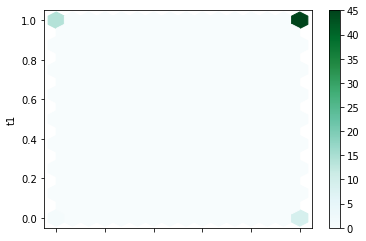

In [118]:
data_clean.plot.hexbin(x = "t1ce", y  = "t1", gridsize = 15)

In [138]:
only_flair_t1_t2 = data_clean[(data_clean["t1ce"] == 0) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

In [155]:
only_flair_t1_t2[0]

14

In [140]:
only_t1ce = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 0) & 
           (data_clean["flair"] == 0) & 
           (data_clean["t2"] == 0)].count()

In [154]:
only_t1ce[0]

9

In [153]:
only_t1_t1c = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 0) & 
           (data_clean["t2"] == 0)].count()
only_flair_t2[0]

2

In [150]:
all_have = data_clean[(data_clean["t1ce"] == 1) & 
           (data_clean["t1"] == 1) & 
           (data_clean["flair"] == 1) & 
           (data_clean["t2"] == 1)].count()

In [151]:
all_have[0]

43

In [156]:
new_data = pd.DataFrame({"only_t1ce":only_t1ce[0], "all_have":all_have[0],"only_flair_t1_t2":only_flair_t1_t2[0],"only_t1_t1c":only_t1_t1c[0]}, index = [0])

In [157]:
new_data.head()

,only_t1ce,all_have,only_flair_t1_t2,only_t1_t1c
0,9,43,14,2


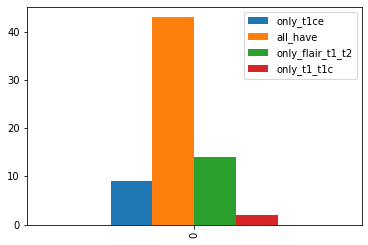

In [158]:
new_data.plot.bar()

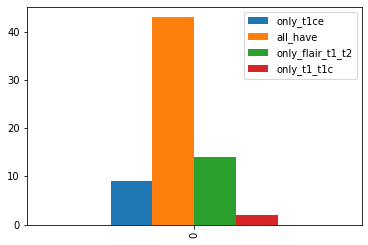

In [160]:
import matplotlib.pyplot as plt
new_data.plot.bar()
plt.savefig(os.path.abspath("modalities.png"))